# MNIST

In [21]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

## Global config

In [22]:

# TODO
# %matplotlib inline
import os
os.chdir("/home/emiel/TUD/machine_learning/CSE2510ML/Final/MNIST")

## Load data

In [23]:
mnist_28x28_train = np.load("mnist_28x28_train.npy")
mnist_8x8_train = np.load("mnist_8x8_train.npy")
train_labels = np.load("train_labels.npy")

mnist_28x28_test = np.load("mnist_28x28_test.npy")
mnist_8x8_test = np.load("mnist_8x8_test.npy")

## Helpers

In [24]:
# TODO

##  Data exploration

### Question 1
Hint: `plt.imshow`


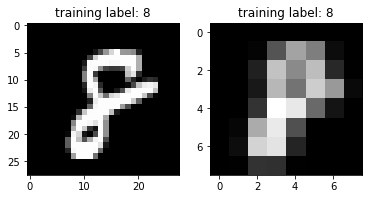

In [36]:
# TODO
idx = 15
fig = plt.figure()
img28 = fig.add_subplot(1, 2, 1)
img8 = fig.add_subplot(1, 2, 2)
img28.set_title("[28*28]training label: " + str(train_labels[idx]))
img8.set_title("[8*8]training label: " + str(train_labels[idx]))
img28.imshow(mnist_28x28_train[idx,:,:], cmap='gray')
img8.imshow(mnist_8x8_train[idx,:,:], cmap='gray')

Looking at several of the written numbers in the training set,
especially the ones with more complex (small circles for the 8 look like a single line)
or similar features
(for example a 2 without a very expresive bottom line looks like a 7),
it can be assumed that the larger images will perform better.

##  Data Preparations

### Question 1

In [42]:
# restructure pictures into vectors
mnist_28x28_train.shape = 28*28
mnist_28x28_test.shape = 28*28
# TODO
#leave it for now, all pixel values are already in the same range

ValueError: cannot reshape array of size 2940000 into shape (784,)

## Experiments

### Question 1

In [47]:
from sklearn.model_selection import train_test_split


mnist_28x28_train_, mnist_28x28_test_, y_train, y_test = train_test_split(mnist_28x28_train, train_labels, test_size=0.1, random_state=42, shuffle=True, stratify=train_labels)

### Question 2

In [51]:
random_state = 42
c=10

models = {
    "GaussianNB": GaussianNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, random_state=random_state),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=3, weights="distance"),
    "SVM": SVC(C=c,random_state=random_state,kernel='poly'),
    "LogisticRegression": LogisticRegression(C=c, penalty="none", random_state=random_state)
}

for name, model in models.items():
    model.fit(X=mnist_28x28_train_,y=y_train)
#
# from sklearn.metrics import f1_score, accuracy_score
#
# for name, model in models.items():
#     prediction = model.predict(mnist_28x28_test_)
#     f1_score_value = f1_score(prediction, y_test, average="weighted")
#     accuracy = accuracy_score(prediction, y_test)
#     print(name)
#     print("- accuracy_score", accuracy)
#     print("- f1_score", f1_score_value)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score

def k_fold_fit_and_evaluate(X, y, model, scoring_method, n_splits=5):
    # define evaluation procedure
    cv = KFold(n_splits=n_splits, random_state=42, shuffle=True)
    # evaluate model
    scores = cross_validate(model, X, y, scoring=scoring_method, cv=cv, n_jobs=-1)


    return scores["test_score"]

scoring_method_f1 = make_scorer(lambda prediction, true_target: f1_score(prediction, true_target, average="weighted"))
for name, model in models.items():
    print(name)
    metrics_f1 = k_fold_fit_and_evaluate(mnist_28x28_train, train_labels, model, scoring_method_f1, n_splits=10)
    # START ANSWER
    print(f"mean: {np.mean(metrics_f1).round(3)}, std: {np.std(metrics_f1).round(3)}")

/home/emiel/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


GaussianNB
mean: 0.525, std: 0.033
DecisionTreeClassifier
mean: 0.745, std: 0.015
KNeighborsClassifier
mean: 0.929, std: 0.011
SVM
mean: 0.93, std: 0.01
LogisticRegression
mean: 0.853, std: 0.015


### Question 3

In [29]:
# TODO

### Question 4 

In [30]:
#TODO

### Question 5

In [31]:
#TODO

### Question 6

In [32]:
#TODO
prediction = np.array([-1] * len(mnist_8x8_test)) #TODO replace this with you own prediction
pd.DataFrame(prediction).to_csv("GROUP_classes_problem_mnist.txt", index=False, header=False)